In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
hb=pd.read_csv('haberman.csv')
#hb
import warnings 

warnings.filterwarnings("ignore") 

In [2]:
print(hb.shape) # number of data points

(306, 4)


In [3]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print( hb["status"].value_counts()) # number of data points for each class
print(hb["age"].value_counts())
print(hb["year"].value_counts())
print(hb["nodes"].value_counts())

1    225
2     81
Name: status, dtype: int64
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64


## *In haberman dataset we have 3 features age,year,nodes and one class label status
## *age,year,nodes are independent variable whereas status is dependent variable
## *based on independent variables status decide whether patient is alive or dead
## *in status 1:determines patient is alive 5 years or longer and 2: determines patient is died within 5 years

# UNIVARIATE ANALYSIS BASED ON AGE
### here both  status 1 and 2 are overlapping 
### from age 50 to 60 years old there are more number of people's who are living more than 5 or more years
### from age 40 to 45(approx) old there are more number of  peoples's who are dead within 5 years

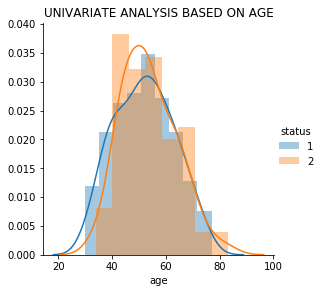

In [5]:
sns.FacetGrid(hb,hue='status',size=4) \
    .map(sns.distplot,'age') \
    .add_legend();
plt.title("UNIVARIATE ANALYSIS BASED ON AGE")
plt.show();

# UNIVARIATE ANALYSIS BASED ON YEAR
### * from year 1960 to 63(approx) patients of status 1 are more
### * from year 1965 to 68(approx) patients of status 2 are more

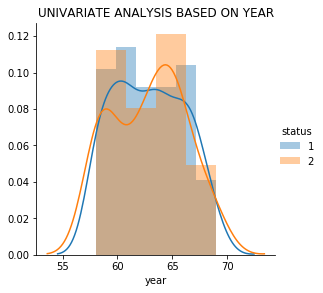

In [6]:
sns.FacetGrid(hb,hue='status',size=4) \
    .map(sns.distplot,'year') \
    .add_legend();
plt.title("UNIVARIATE ANALYSIS BASED ON YEAR")
plt.show();

# UNIVARIATE ANALYSIS BASED ON NODES
### * nodes which lies between 0 to 1 there are more number of status 1
### * nodes wbich lies between 0 to 5 there are more number of status 2

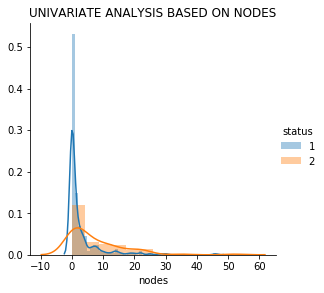

In [7]:
sns.FacetGrid(hb,hue='status',size=4) \
    .map(sns.distplot,'nodes') \
    .add_legend();
plt.title("UNIVARIATE ANALYSIS BASED ON NODES")
plt.show()

# PLOTTING CDF BASED ON STATUS1
### *between age 50 to 60 years probablity of living more than 5 years is more 
### * cdf is increasing as it is summing up the total  number of people live more than  5 years as age increasing 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


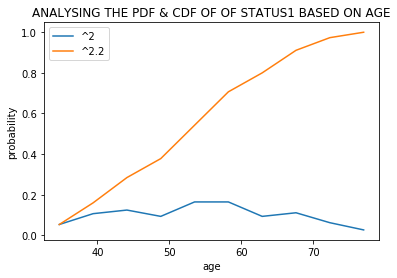

In [8]:
hb_status1=hb.loc[hb["status"] == 1]; #data frame consists of status1
counts, bin_edges = np.histogram(hb_status1["age"],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title("ANALYSING THE PDF & CDF OF OF STATUS1 BASED ON AGE")
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()
plt.show();

# PLOTTING CDF BASED ON STATUS1
### *before 1960 probability status 1 is  up to  20% and after 1960 is less than 20%
### *cdf is increasing as years are incraesing at 1960 it is up to 20% at 1968 it went up to 80% as it is counting the status 1 as years passing

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


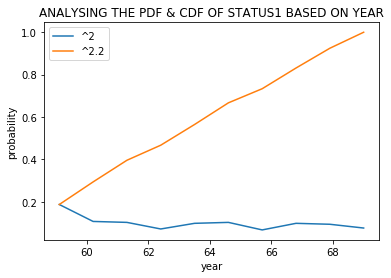

In [9]:
hb_status1=hb.loc[hb["status"] == 1]; #data frame consists of status1
counts, bin_edges = np.histogram(hb_status1['year'],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title("ANALYSING THE PDF & CDF OF STATUS1 BASED ON YEAR")
plt.xlabel('year')
plt.ylabel('probability')
plt.legend()

plt.show();

# PLOTTING CDF BASED ON STATUS1
### *nodes which are less than 10 for cancer patients probability of living is high up to 80%
### *as nodes are increasing probability of living decreases and it decreases up to 10%
### *cdf is high at which nodes are less for cancer patients but it did not decreased as nodes are increasing it remained constant

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


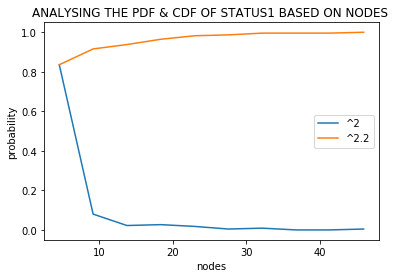

In [10]:
hb_status1=hb.loc[hb["status"] == 1]; #data frame consists of status1
counts, bin_edges = np.histogram(hb_status1['nodes'],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title("ANALYSING THE PDF & CDF OF STATUS1 BASED ON NODES ")
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

# PLOTTING CDF BASED ON STATUS2
### *patients who had age 40 their death probability is as low as 10% 
### * patients whose age lies between 50 to 55 status2 probability is 20% which is maximum in this graph
### *cdf graph is increasing as age is increasing and counting the number od patients who died wihtin 5 years 

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


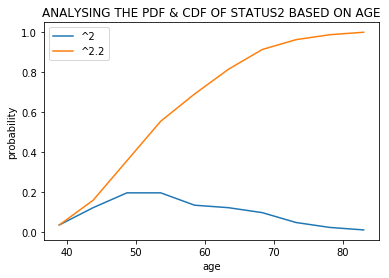

In [11]:
hb_status2=hb.loc[hb["status"] == 2];#data frame consists of status2
counts, bin_edges = np.histogram(hb_status2["age"],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title("ANALYSING THE PDF & CDF OF STATUS2 BASED ON AGE")
plt.xlabel("age")
plt.ylabel("probability")
plt.legend()
plt.show();

# PLOTTING CDF BASED ON STATUS2
### * before 1960 patients probability of status 2 is more and after it dropped suddenly and then increased but not as much as  before 1960
### *cdf is also increasing probability of status 2 increasing as years are passing

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


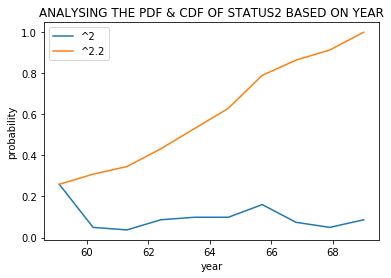

In [12]:
hb_status2=hb.loc[hb["status"] == 2];#data frame consists of status2
counts, bin_edges = np.histogram(hb_status2["year"],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title('ANALYSING THE PDF & CDF OF STATUS2 BASED ON YEAR')
plt.xlabel('year')
plt.ylabel('probability')
plt.legend()

plt.show();

# PLOTTING CDF BASED ON STATUS2


### * before node 10 the death probability is more and after the node 10 death probability gradualy decreases
### * cdf graph increases up to node 20 after that it remains constant

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


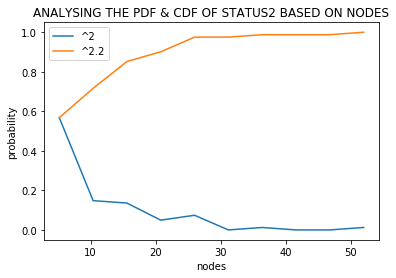

In [13]:
hb_status2=hb.loc[hb["status"] == 2];#data frame consists of status2
counts, bin_edges = np.histogram(hb_status2["nodes"],bins=10,
                                density = True)
#pdf
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='^2')
plt.plot(bin_edges[1:],cdf,label='^2.2')
plt.title("ANALYSING THE PDF & CDF OF STATUS2 BASED ON NODES")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.legend()
plt.show()

# boxplots
### *those three lines in the box represents the 25th,50th,75th percentiles
### *at 75th percentile if people below 62 years status 1 and status 2 were overlapping which means there was an error

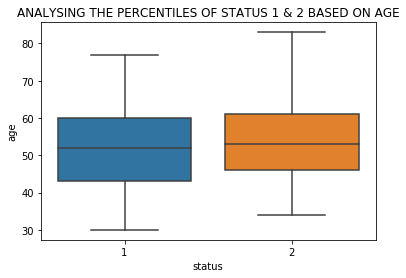

In [14]:
sns.boxplot(x='status',y='age', data=hb)
plt.title("ANALYSING THE PERCENTILES OF STATUS 1 & 2 BASED ON AGE")
plt.show()


### patients at age 65 years old 75th percentile of status 2 will overlap with status 1 there was an error

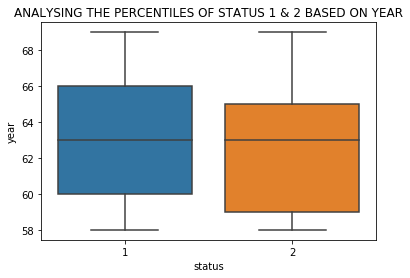

In [15]:
sns.boxplot(x='status',y='year', data=hb)
plt.title("ANALYSING THE PERCENTILES OF STATUS 1 & 2 BASED ON YEAR")
plt.show()


### *in status1  25th and 50th percentile are same containg nodes 0 at 50th percentile status 1  will overlap with status2
###  * patients who got nodes below 5  they will fall under status 1 and status2

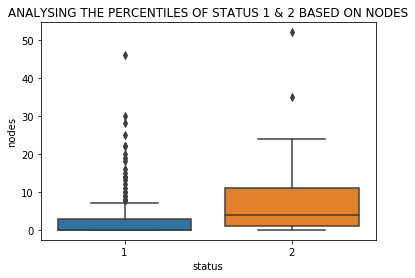

In [16]:
sns.boxplot(x='status',y='nodes', data=hb)
plt.title("ANALYSING THE PERCENTILES OF STATUS 1 & 2 BASED ON NODES")
plt.show()

# VIOLIN PLOTS

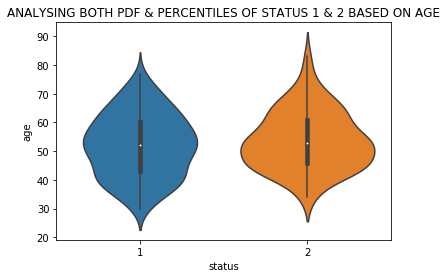

In [17]:
sns.violinplot(x='status',y='age',data=hb)
plt.title("ANALYSING BOTH PDF & PERCENTILES OF STATUS 1 & 2 BASED ON AGE")
plt.show()

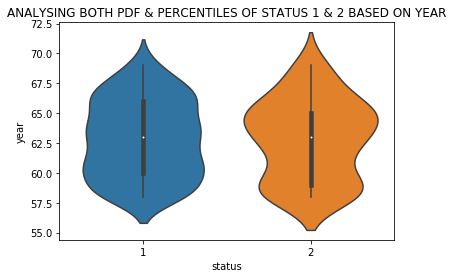

In [18]:
sns.violinplot(x='status',y='year',data=hb)
plt.title("ANALYSING BOTH PDF & PERCENTILES OF STATUS 1 & 2 BASED ON YEAR")
plt.show()

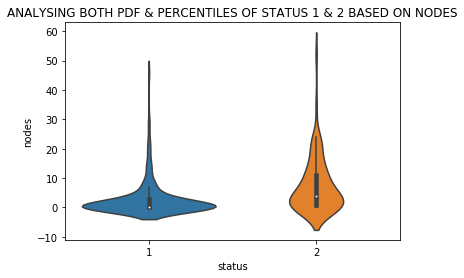

In [19]:
sns.violinplot(x='status',y='nodes',data=hb)
plt.title("ANALYSING BOTH PDF & PERCENTILES OF STATUS 1 & 2 BASED ON NODES")
plt.show()

### *in violin plots there is box plot inside it and side curve represents the probability density function

# Bi-VARIATE ANALYSIS

### *age varies from 30 to 80
### *year varies from 1958 to 1968

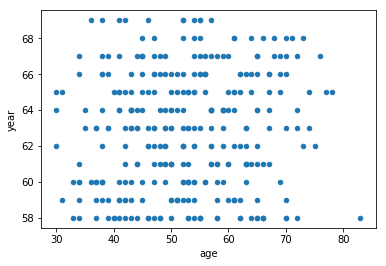

In [20]:
hb.plot(kind='scatter',x='age',y='year');
plt.show()


### *nodes varies from 0 to 50

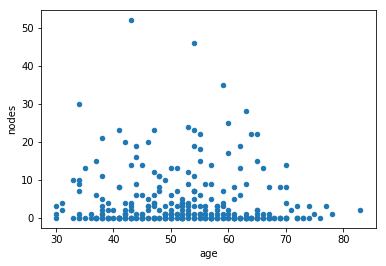

In [21]:
hb.plot(kind='scatter',x='age',y='nodes');
plt.show()

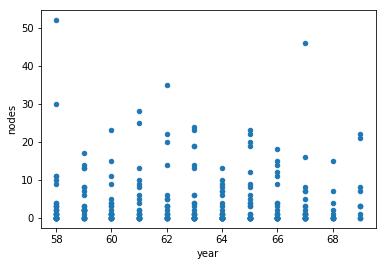

In [22]:
hb.plot(kind='scatter',x='year',y='nodes');
plt.show()

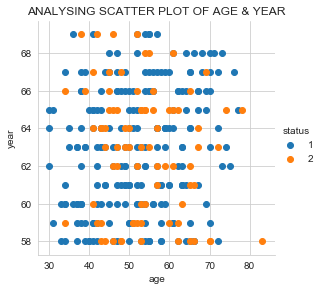

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(hb,hue="status",size=4) \
    .map(plt.scatter,"age","year") \
    .add_legend();
plt.title("ANALYSING SCATTER PLOT OF AGE & YEAR")
plt.show()

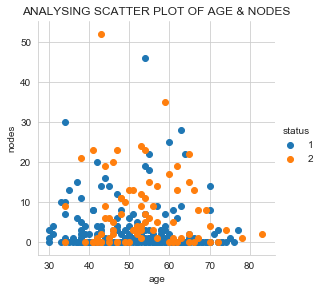

In [24]:
sns.set_style("whitegrid");
sns.FacetGrid(hb,hue="status",size=4) \
    .map(plt.scatter,"age","nodes") \
    .add_legend();
plt.title("ANALYSING SCATTER PLOT OF AGE & NODES")
plt.show();

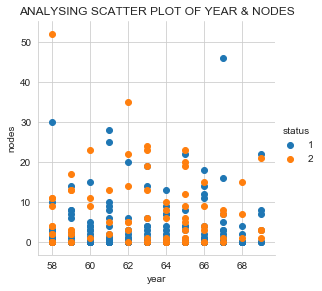

In [25]:
sns.set_style("whitegrid");
sns.FacetGrid(hb,hue="status",size=4) \
    .map(plt.scatter,"year","nodes") \
    .add_legend();
plt.title("ANALYSING SCATTER PLOT OF YEAR & NODES")
plt.show();

# in all the three plots above by colouring these plots we cannot seperate status1 and status2

# PAIR PLOTS
### *these plots are useful in analysing with more than 2 features and decide which feature gives us the best result
### *the diagonal plots give us about pdf of age year and nodes based on observation of status1 and status2
### * rest of the plots are 2-D scatter plots

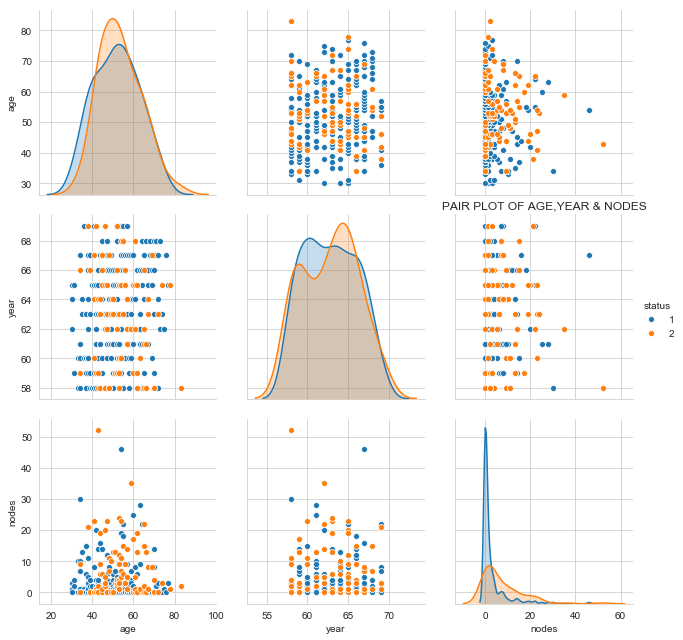

In [26]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb,hue="status",vars=["age","year","nodes"],size=3);
plt.title("PAIR PLOT OF AGE,YEAR & NODES")
plt.show()